*Do not delete this style setting*

In [1]:
%%html
<style>
table {float:left}
</style>

# Session 4<br>Quantum-Classical Hybrid Models

<table>
    <tr><td><strong>Aim:</strong></td>
        <td>To explore the creation and use of a hybrid quantum-classical classifiers in <strong>PennyLane</strong> and <strong>PyTorch</strong>.
            Note that by embedding a PennyLane model in PyTorch, we have gained a
            richer machine learning environment than that available in PennyLane
            alone. One of the aims of this session is to explore explore the
            opportunities.</td></tr>
    <tr><td><strong>Author:</strong></td>
        <td>Jacob L. Cybulski (<a href="https://jacobcybulski.com/" target="_blank">website</a>),
            <em>Enquanted</em></td></tr>
    <tr><td><strong>Release:</strong></td>
        <td>September 2025</td></tr>
    <tr><td><strong>Datasets:</strong></td>
        <td>We will use the following two datasets from UCI repository (require: pip install ucimlrepo):<br>
        <ol>
            <li><a href="https://archive.ics.uci.edu/dataset/10/automobile" target="_blank">Automobiles</a>:
              This is a database of automobile specs. The aim is to determine its insurance risk (symboling). Data loading and preprocessing was included below.</li>
            <li><a href="https://archive.ics.uci.edu/dataset/151/connectionist+bench+sonar+mines+vs+rocks" target="_blank">Sonar</a>:
              The aim is to discriminate between sonar signals bounced off a mine (metal cylinder) or a rock (roughly cylindrical).</li>
        </ol></td></tr>
    <tr><td><strong>Tasks:</strong></td>
        <td>40 minutes (unfinished tasks go to self-directed "challenges")</td></tr>
    <tr>
        <td></td>
        <td>Perform the following tasks<br>(record your observations at end of this notebook):<br>
        <ol>
            <li>Initially use the <strong><em>Automobiles</em></strong> dataset 1 (as provided).<br>
                Follow the instructor demonstration to step through the code.
                <ul>
                  <li>we will investigate the structure of the LogisticRegression model<br>
                  which needs to be evolved from the previously developed Quantum_Auto.</li>
                  <li>we will rely on some of the previously discussed data preparation steps.<br>
                  Note the model training and test performance (Cost and Accuracy)</li>
                </ul>
            </li>
            <li>First we will apply sigmoid function to the model predictions (forward).
                <ul>
                  <li>Can you execute and score the new model without any issues?<br>
                      - If so, you are lucky! You have a quantum logarithmic regression model!<br>
                      - If not, think why not and go to the next step!</li>
                </ul>
            </li>
            <li>Let's change our quantum model to measure the probability of the top qubit?
                <ul>
                  <li>Did it work? If not at what point in the process did you get an error?<br>
                      - Trace back your steps and check all statements leading to an error.<br>
                      - Fix the problem inside the PyTorch model. How?</li>
                  <li>Hint: add a classical layer to the PyTorch model.<br>
                      If it worked, can the model performance improve by more training epochs?<br>
                      - We now have a working hybrid quantum-classical logarithmic regression model!
                  </li>
                </ul>
            </li>
            <li>We have left an Easter egg surprise within the LogisticRegression model.
                <ul>
                    <li>Use it to generate a complex hybrid model.</li>
                    <li>Test its performance. Can you explain the results?</li>
                    <li>Now remove the quantum model from the model and check again.</li>
                    <li>What does it mean?</li>
                </ul>
            </li>
            <li>Compare all models developed in this session and their performance.</li>
            <li>Reflect on this session.</li>
        </ol></td>
    </tr>
    <tr>
        <td><strong>Challenge<br>Tasks:</strong></td>
        <td>Perform one or more of the following tasks in your own time:<br/>
        <ol style="list-style-type: upper-alpha;">
            <li>Complete the unfinished tasks.</li>
            <li>Use LBFGS optimiser (reduce the number of epochs to 20).<br>
                Have you noticed any impact on the model performance?</li>
            <li>Use a different quantum model and see if it helps.</li>
            <li>Investigate the notebook for quantum autoencoders (QAE)
            <ul>
                <li>Explore the dataset generated by Mackeyâ€“Glass function, as well as<br>
                    the quantum implementations of the replicating and denoising QAEs</li>
                <li>Rewrite the denoising QAE within the PyTorch nn.Module framework.</li>
                <li>Test your PennyLane / PyTorch QAE model.</li>
                <li>Improve the model performance.</li>
            </ul></li>
            <li>Reflect on this challenge.</li>
        </ol></td>
    </tr>
    <tr><td><strong><br>References:</strong></td>
        <td>Organising Torch layers in PennyLane:<br>
            <ul>
            <li><a href = "https://pennylane.ai/qml/demos/tutorial_qnn_module_torch" target="_blank">Thomas Bromley, "Turning quantum nodes into Torch Layers",<br>
                PennyLane Demo, October 7, 2024.</a></li>
            <li><a href = "https://docs.pennylane.ai/en/stable/code/api/pennylane.qnn.TorchLayer.html" target="_blank">PennyLane, "qml.qnn.TorchLayer",<br>
                PennyLane Documentation, Code API, 2025.</a></li>
            <li><a href = "https://pennylane.ai/qml/demos/tutorial_local_cost_functions" target="_blank">Thomas Storwick, "Alleviating barren plateaus with local cost functions",<br>
                PennyLane Tutorial, November 6, 2024.</a></li>
            </ul>
        </td>
    </tr>
    <tr><td><strong>License:</strong></td>
        <td>This project is licensed under the
            <a href="https://www.gnu.org/licenses/gpl-3.0.en.html" target="_blank">GNU General Public License v3</a></td></tr>
    <tr><td><strong>Changes:</strong></td>
        <td>All significant changes to this code must be recorded in this notebook</td></tr>
</table>

## Libraries

In [2]:
import sys
sys.path.append('.')
sys.path.append('..')
sys.path

['/home/jacob/miniconda3/envs/pl_test/lib/python311.zip',
 '/home/jacob/miniconda3/envs/pl_test/lib/python3.11',
 '/home/jacob/miniconda3/envs/pl_test/lib/python3.11/lib-dynload',
 '',
 '/home/jacob/miniconda3/envs/pl_test/lib/python3.11/site-packages',
 '.',
 '..']

In [3]:
### General libraries

import os
import pylab
import math
import time
import copy
import pandas as pd
from IPython.display import clear_output

import matplotlib.pyplot as plt
from matplotlib import set_loglevel
set_loglevel("warning")

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
### Utilities

from utilities import multi_plot_hist, multi_plot_series, draw_circuit

In [5]:
### ML packages

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split

In [6]:
### PennyLane and Torch packages

import pennylane as qml
from pennylane import numpy as np
from pennylane import NesterovMomentumOptimizer
from torch import nn, optim, sigmoid, softmax
from torch.autograd import Variable
import torch

---

## <font color="blue">Data preparation</font>
Selected dataset: <a href="https://archive.ics.uci.edu/dataset/10/automobile" target="_blank">Automobiles</a>.

In [7]:
### Dataset settings
#   How many data features we'd like to keep (compressed)
n_features = 5
data_seed = 42

### Load and understand data

In [8]:
from ucimlrepo import fetch_ucirepo

auto = fetch_ucirepo(id=10)
X_vars = auto.data.features 
y_class = auto.data.targets
X_vars.columns

Index(['price', 'highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower',
       'compression-ratio', 'stroke', 'bore', 'fuel-system', 'engine-size',
       'num-of-cylinders', 'engine-type', 'curb-weight', 'height', 'width',
       'length', 'wheel-base', 'engine-location', 'drive-wheels', 'body-style',
       'num-of-doors', 'aspiration', 'fuel-type', 'make', 'normalized-losses'],
      dtype='object')

### Preprocess data

In [9]:
### Shuffle X and y together
np.random.seed(data_seed)
idx = np.random.permutation(X_vars.index)
X_vars = X_vars.reindex(idx)
X_vars.index = list(range(X_vars.shape[0]))
y_class = y_class.reindex(idx)
y_class.index = list(range(y_class.shape[0]))

### Select numerical columns only!
#   Note: we could have one-hot encoded categorical
X_sel = X_vars.select_dtypes(include=np.number)

### Eliminate missing values with column mean
auto_xmean = X_sel.mean()
X_sel = X_sel.fillna(auto_xmean)

# Standardise all variables
auto_scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled = auto_scaler.fit_transform(X_sel) 
X_std = pd.DataFrame(scaled, columns=X_sel.columns)

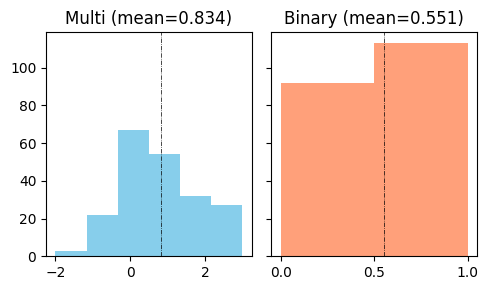

In [10]:
### Transform the label from multinomial to binomial

# Current label mean
auto_ymean = y_class["symboling"].mean()

# Create a binary label
pd.set_option('display.max_rows', 10)
y_std = pd.DataFrame(y_class)
y_std['symboling'] = np.where(y_std['symboling'] > auto_ymean, 1, 0)
y_binmean = y_std["symboling"].mean()

# Plot both distributions
plt.rcParams["figure.figsize"] = [5, 3]
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist(y_class["symboling"], bins=6, color='skyblue')
axs[0].set_title(f'Multi (mean={round(auto_ymean, 3)})')
axs[0].axvline(auto_ymean, color='k', linestyle='-.', linewidth=0.5)
axs[1].hist(y_std['symboling'], bins=2, color='lightsalmon')
axs[1].set_title(f'Binary (mean={np.round(y_binmean, 3)})')
axs[1].axvline(y_binmean, color='k', linestyle='-.', linewidth=0.5)

plt.show()

### Reduce data dimensionality
**Feature selection** based on PCA

In [11]:
from sklearn.decomposition import PCA

n_components = n_features
auto_pca = PCA(n_components=n_components)
X_pca = auto_pca.fit_transform(X_std)
X_pca = pd.DataFrame(X_pca, columns=[f'PC{n:02d}' for n in range(X_pca.shape[1])])
pca_var = auto_pca.explained_variance_ratio_
print(f'Explained var = {np.sum(pca_var):02.3f}')
X_pca.columns

Explained var = 0.869


Index(['PC00', 'PC01', 'PC02', 'PC03', 'PC04'], dtype='object')

**Variable selection** X, y data for moedling

In [12]:
X = X_pca.copy()
y = y_std.copy()

---

## <font color="blue">Model development</font>

### Model and training configuration

In [13]:
### Data params
n_data = X.shape[0]
x_angle_margin = 0.0               # Could be: 0.1
x_angle_min = 0+x_angle_margin     # We leave it as is
x_angle_max = 1-x_angle_margin     # Could be: np.pi-x_angle_margin

### Architectural params
n_wires = n_features  # The model ansatz may have less data than wires
n_layers = 5
wires = list(range(n_wires))

### Training params
epochs = 100     # 20 for LBFGS # 50 # 80 # 100 # 300
log_interv = 1   # History to be saved only once every interv or epochs
acc_prec = 0.5   # Precision of accuracy calculation
shots = None     # None means using theoretical frequency distribution 
seed = 2025

In [14]:
(n_data, n_wires, n_layers, epochs, shots)

(205, 5, 5, 100, None)

### Data preparation for quantum modeling
We can experiment with encoding ranges to see which is best

In [15]:
### Standardise X values to Rxyz angles
angle_scaler = MinMaxScaler(feature_range=(x_angle_min, x_angle_max)) 
scaled = angle_scaler.fit_transform(X) 
X_ang = pd.DataFrame(scaled, columns=X.columns)

In [16]:
### Create data partitions, data has been shuffled before
X_train, X_test, y_train, y_test = train_test_split(X_ang.iloc[:,0:n_data], y.iloc[:,0:n_data], 
    test_size=0.33, shuffle=False, random_state=seed)
print(f'Shapes: X_train={X_train.shape}, X_test={X_test.shape}, ' +\
      f'y_train={y_train.shape}, y_test={y_test.shape}')

Shapes: X_train=(137, 5), X_test=(68, 5), y_train=(137, 1), y_test=(68, 1)


In [17]:
### Change data to tensors
X_train_tens = torch.tensor(np.array(X_train), dtype=torch.double)
y_train_tens = torch.tensor(np.array(y_train), dtype=torch.double)
X_test_tens  = torch.tensor(np.array(X_test), dtype=torch.double)
y_test_tens  = torch.tensor(np.array(y_test), dtype=torch.double)

### Utilities

In [18]:
### Performance measures

### A simple differentiable MSE cost function
def square_mse(labels, predictions):
    sq_diffs = torch.tensor([(l - p)**2 for l, p in zip(labels, predictions)])
    return sq_diffs.mean().item()

### A simple differentiable accuracy
def accuracy(labels, predictions, prec=1e-5):
    acc = sum(abs(l - p) < prec for l, p in zip(labels, predictions))
    acc = acc / len(labels)
    return acc.item()

### Counts the number of pytorch model parameters
def count_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

### Define devices

In [19]:
### Find and select devices for PL and PyTorch

# Quantum simulator
sim = 'default.qubit' # default.qubit lightning.qubit lightning.gpu

# Enable GPU device if available
if torch.cuda.is_available():   # for Linux / Windows with GPU
    torch_device = 'cuda'
elif torch.mps.is_available():  # for Mac with GPU
    torch_device = 'mps'
else:
    torch_device = 'cpu'        # for everybody else
torch_device = "cpu"            # Force CPU if needed

print(f'\nThe available devices:\t{sim} and {torch_device}')
print(f'Devices to be used:\t{sim} and {torch_device}\n')


The available devices:	default.qubit and cpu
Devices to be used:	default.qubit and cpu



### PennyLane model development

In [20]:
### Define a simple quantum model
def qmodel(n_wires):
    wires = list(range(n_wires))
    def _qmodel(inputs, weights):
        nonlocal wires, n_wires #, meas_wires
        qml.AngleEmbedding(inputs, wires=wires)        
        qml.StronglyEntanglingLayers(weights, wires=wires)
        return [qml.expval(qml.PauliZ(0))] # Range [-1..1] - as needed by MSELoss
    return _qmodel

In [21]:
### Check the model shape
def qshape(n_wires, n_layers=1):
    shape = qml.StronglyEntanglingLayers.shape(n_layers=n_layers, n_wires=n_wires)
    return shape

### PyTorch model with PennyLane layer

In [22]:
import pennylane as qml
from pennylane import numpy as np

To use PennyLane Torch layers refer to the 
<a href="https://docs.pennylane.ai/en/stable/code/api/pennylane.qnn.TorchLayer.html" target="_blank">TorchLayer PennyLane API</a>
as well as <a href = "https://pennylane.ai/qml/demos/tutorial_qnn_module_torch" target="_blank">Thomas Bromley tute on Torch layers</a>.

In [23]:
##### Custom PyTorch/PennyLane module for logistic regression
class LogisticRegression(torch.nn.Module):
    """ 
    Implementation of the hybrid quantum-classical logistic regression
    Parameters:
    - sim: name of a PennyLane device
    - n_wires: number of wires for the quantum model (= qubits/features)
    - n_layers: number of trainable entangling layers
    - shots: number of shots per quantum execution
      if None, then theoretical outcome if calculated
    Result:
    - PyTorch model
    """
    
    ### build the constructor
    def __init__(self, sim, n_wires, n_layers=1, shots=None):
        super().__init__()
        
        self.sim = sim
        self.n_wires = n_wires
        self.n_layers = n_layers
        self.shots = shots

        layers = [self.qlayer()]
        self.model = torch.nn.Sequential(*layers)
        
    ### PyTorch layer around the PennyLane model
    def qlayer(self):
        
        # Specify a device
        dev = qml.device(self.sim, wires=self.n_wires, shots=self.shots)

        # Define the quantum model and its circuit (or node, save it for later)
        model_pl = qmodel(self.n_wires)
        self.model_qc = qml.QNode(model_pl, dev, interface='torch')

        # Define the shape of the model weight parameters
        # Note that the name "weights" must match the param name defined in function 
        # "model_pl" which in our case is _qmodel(inputs, weights)
        weights_shapes = {"weights": qshape(self.n_wires, n_layers=self.n_layers)}

        # Turn the circuit into a Torch-compatible quantum layer
        qlayer = qml.qnn.TorchLayer(self.model_qc, weight_shapes=weights_shapes)
        return qlayer

    ### Overkill model
    def easter_egg_layers(self):
        lin1 = torch.nn.Linear(self.n_wires, 32)
        relu1 = torch.nn.ReLU()
        lin2 = torch.nn.Linear(32, 64)
        relu2 = torch.nn.ReLU()
        lin3 = torch.nn.Linear(64, 32)
        relu3 = torch.nn.ReLU()
        lin4 = torch.nn.Linear(32, self.n_wires)
        relu4 = torch.nn.ReLU()
        qmodel = self.qlayer()
        lin5 = torch.nn.Linear(2, 1)
        layers = [lin1, relu1, lin2, relu2,
                  lin3, relu3, lin4, relu4,
                  qmodel]
        return layers

    ### Return the quantum model circuit
    def qmodel_qc(self):
        return self.model_qc
 
    ### Make predictions
    def forward(self, x):
        y_pred = self.model(x)            # returns predictions           
        return y_pred

### Test the PennyLane/PyTorch model before use
For some reason PennyLane crashes whan lighting.qubits is in use

In [24]:
(sim, n_wires, n_layers, shots)

('default.qubit', 5, 5, None)

In [25]:
test = LogisticRegression(sim, n_wires, n_layers=n_layers, shots=shots).double().to(torch_device)
shape = qshape(n_wires, n_layers)
n_weights = np.prod(shape)
test_results = test(X_train_tens[0:5])
print(f'\nQM weights: {count_params(test)}, Epochs: {epochs}')
print(f'\nInputs:\n{X_train_tens[0:5]}\n')
print(f'\nLabels:\n{y_train_tens[0:5]}\n')
print(f'\nTest results:\n{test_results}\n')

test.eval()


QM weights: 75, Epochs: 100

Inputs:
tensor([[0.7715, 0.4629, 0.0764, 0.2773, 0.4974],
        [0.3302, 0.3859, 0.1615, 0.3242, 0.6821],
        [0.5645, 0.8158, 0.1465, 0.3517, 0.4953],
        [0.3445, 0.4707, 0.3380, 0.6240, 0.7969],
        [0.8883, 0.5390, 0.8176, 0.3153, 0.6299]], dtype=torch.float64)


Labels:
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [0.]], dtype=torch.float64)


Test results:
tensor([[-0.0271],
        [-0.0419],
        [ 0.0262],
        [ 0.0087],
        [-0.0399]], dtype=torch.float64, grad_fn=<ViewBackward0>)



LogisticRegression(
  (model): Sequential(
    (0): <Quantum Torch Layer: func=_qmodel>
  )
)

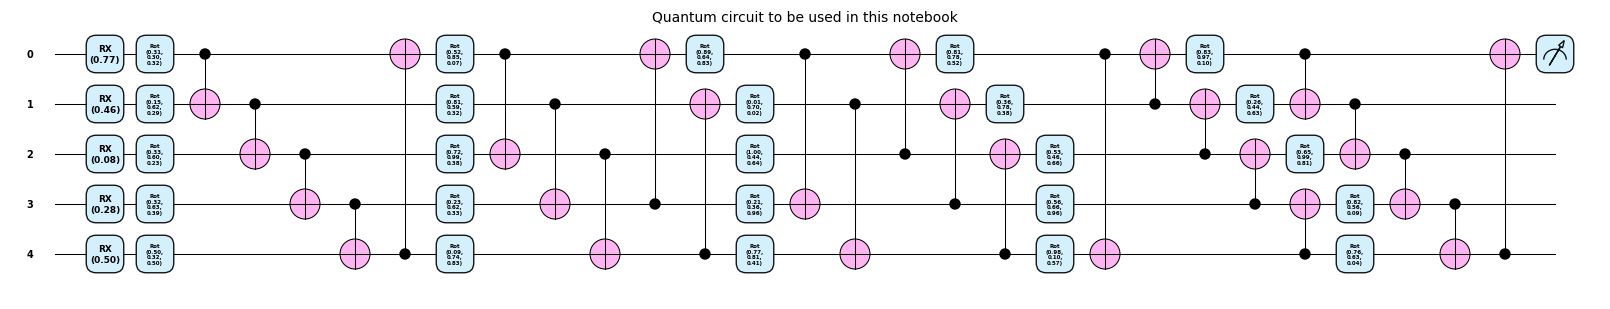

In [26]:
### Draw the test model circuit
weights = torch.rand(shape, requires_grad=True)
draw_circuit(test.qmodel_qc(), scale=0.5, title='Quantum circuit to be used in this notebook', level='device') \
    (X_train_tens[0], weights) # level='device'/'gradient'

### Create and train a the PennyLane/PyTorch model

In [27]:
## Optional for simple gradient optimisers, such as Adam
## Required by optimisers with internal steps, such as LBFGS
## Works for both types of optimisers
def make_closure(X, Y, model, optimizer, lossfun):
    def _closure():
        nonlocal X, Y, model, optimizer, lossfun
        if torch.is_grad_enabled():
            optimizer.zero_grad()
        output = model(X)
        loss = lossfun(output, Y)
        if loss.requires_grad:
            loss.backward()
        return loss
    return _closure

In [28]:
### Trains a PyTorch model (of any kind)

def train_model(model, X, y, cost_fun, acc_fun, optimizer, epochs=20, 
                log_interv=100, prompt_fract=0.1, acc_prec=0.5, start_time=0):
    
    history = []
    acc_hist = []
    opt_params = {}
    hist_params = []
    min_epoch = 0
    min_cost = float(np.inf)
    max_acc = -float(np.inf)
    if start_time == 0: start_time = time.time()
    
    model.train()
    for epoch in range(epochs):
        
        optimizer.zero_grad()
        output = model(X)
        cost = cost_fun(output, y)
        acc = acc_fun(output, y, prec=acc_prec)
        cost.backward()
        optimizer.step()

        curr_cost = cost.item()
        curr_acc = acc
        if curr_cost < min_cost: 
            min_cost = curr_cost
            min_epoch = epoch
            opt_params = copy.deepcopy(model.state_dict())

        if curr_acc > max_acc:
            max_acc = curr_acc

        if epoch % log_interv == 0:
            history.append(curr_cost)
            acc_hist.append(curr_acc)
            hist_params.append(copy.deepcopy(model.state_dict()))

        elapsed = time.time() - start_time
        if (prompt_fract == 0) or (epoch % int(prompt_fract*epochs) == 0):
            print(f'{epoch: 5d} '+ \
                  f'({elapsed:06.0f} sec): '+ \
                  f'Cost {curr_cost:6.4g}   '+ \
                  f'Acc {curr_acc:6.4g}')
            
    return history, acc_hist, opt_params, hist_params, (min_epoch, min_cost)

### Training loop

In [29]:
### Ensure repeatability
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

### Create a model
log_regr = LogisticRegression(sim, n_wires, n_layers, shots).double().to(torch_device)

### Loss and optimiser
cost_fun = nn.MSELoss() # for prediction values
opt = optim.NAdam(log_regr.parameters(), lr=0.01)

### Train the model
print()

prompt_fract = 0.1
start_time = time.time()
train_bce_hist, train_acc_hist, opt_params, hist_params, opt_point = \
    train_model(log_regr, X_train_tens, y_train_tens, 
                cost_fun, accuracy, opt, epochs=epochs, acc_prec=acc_prec, 
                log_interv=log_interv, prompt_fract=prompt_fract)

elapsed = time.time() - start_time

### Print the training summary
train_bce_min = np.min(train_bce_hist)
train_bce_iter = np.argmin(train_bce_hist)
train_acc_max = np.max(train_acc_hist)
train_acc_iter = np.argmax(train_acc_hist)

time_str = time.strftime("%H:%M:%S", time.gmtime(elapsed))
print(f'\nTraining completed:\n'+\
      f'\tin {epochs} epochs and {elapsed:0.0f}sec ({time_str})\n'+
      f'Training scores:\n'+
      f'\tmin BCE = {np.round(train_bce_min, 5):05.4f} @ {train_bce_iter:04d}\n'+
      f'\tmax ACC = {np.round(train_acc_max, 5):05.4f} @ {train_acc_iter:04d}\n')


    0 (000000 sec): Cost 0.4735   Acc 0.4453
   10 (000000 sec): Cost 0.2602   Acc 0.4745
   20 (000000 sec): Cost 0.2277   Acc 0.6131
   30 (000000 sec): Cost 0.2077   Acc 0.7956
   40 (000001 sec): Cost 0.1943   Acc 0.8394
   50 (000001 sec): Cost 0.1845   Acc 0.8248
   60 (000001 sec): Cost 0.1773   Acc 0.8467
   70 (000001 sec): Cost  0.172   Acc 0.8394
   80 (000001 sec): Cost 0.1677   Acc 0.8394
   90 (000001 sec): Cost 0.1639   Acc 0.8613

Training completed:
	in 100 epochs and 2sec (00:00:01)
Training scores:
	min BCE = 0.1608 @ 0099
	max ACC = 0.8686 @ 0097



### Calculate testing scores

In [30]:
### Calculate a model score as defined by the scoring function
def score_model(model, params, X, y, score_fun, score_name='Score', score_min=True):

    ### Initialise scoring
    score_hist = []
    min_mse_iter = -1
    if score_min:
        opt_score = float(np.inf)
    else:
        opt_score = -float(np.inf)
    
    ### Calculate scores
    print()
    for iter in range(len(hist_params)):
        log_regr.load_state_dict(params[iter])
        pred = log_regr(X)
        curr_score = score_fun(pred, y)
        if type(curr_score) is torch.Tensor:
            curr_score = curr_score.item()
        score_hist.append(curr_score)
        if (not score_min and (curr_score > opt_score)) or \
           (score_min and (curr_score < opt_score)):
            opt_score = curr_score
            opt_score_iter = iter
        if (prompt_fract == 0) or (iter % int(prompt_fract*epochs) == 0):
            print(f'Iter#: {iter:3d} / {epochs:3d}, '+
                  f'{score_name} = {curr_score:.6f}')
    print()
    return score_hist, opt_score, opt_score_iter

In [31]:
### Calculate testing BCE and Acc scores
#   Note: training scores have already been calculated

test_acc_hist, test_acc_max, test_acc_iter = \
    score_model(log_regr, hist_params, X_test_tens, y_test_tens, 
    lambda pred, targ: accuracy(pred, targ, prec=acc_prec), score_name='Test Acc', score_min=False)
test_bce_hist, test_bce_min, test_bce_iter = \
    score_model(log_regr, hist_params, X_test_tens, y_test_tens, cost_fun, score_name='Test BCE', score_min=True)


Iter#:   0 / 100, Test Acc = 0.455882
Iter#:  10 / 100, Test Acc = 0.514706
Iter#:  20 / 100, Test Acc = 0.617647
Iter#:  30 / 100, Test Acc = 0.764706
Iter#:  40 / 100, Test Acc = 0.808824
Iter#:  50 / 100, Test Acc = 0.838235
Iter#:  60 / 100, Test Acc = 0.823529
Iter#:  70 / 100, Test Acc = 0.808824
Iter#:  80 / 100, Test Acc = 0.794118
Iter#:  90 / 100, Test Acc = 0.794118


Iter#:   0 / 100, Test BCE = 0.377653
Iter#:  10 / 100, Test BCE = 0.244298
Iter#:  20 / 100, Test BCE = 0.225874
Iter#:  30 / 100, Test BCE = 0.212441
Iter#:  40 / 100, Test BCE = 0.202545
Iter#:  50 / 100, Test BCE = 0.194980
Iter#:  60 / 100, Test BCE = 0.189620
Iter#:  70 / 100, Test BCE = 0.185948
Iter#:  80 / 100, Test BCE = 0.183362
Iter#:  90 / 100, Test BCE = 0.181428



In [32]:
### Run summary
time_str = time.strftime("%H:%M:%S", time.gmtime(elapsed))
print(f'\nCompleted calculation of testing scores\n\nSummary of model training run\n\n\t'+
      f'params = {count_params(log_regr)}, '+
      f'epochs = {epochs}, '+
      f'time = {elapsed:0.0f}sec ({time_str})\n\t'+
      f'training: BCE = {np.round(train_bce_min, 5):05.4f} @ {train_bce_iter:04d}, '+
      f'ACC = {np.round(train_acc_max, 5):05.4f} @ {train_acc_iter:04d}\n\t'+
      f'testing:  BCE = {np.round(test_bce_min, 5):05.4f} @ {test_bce_iter:04d}, '+
      f'ACC = {np.round(test_acc_max, 5):05.4f} @ {test_acc_iter:04d}'+
      f'\n'
     )


Completed calculation of testing scores

Summary of model training run

	params = 75, epochs = 100, time = 2sec (00:00:01)
	training: BCE = 0.1608 @ 0099, ACC = 0.8686 @ 0097
	testing:  BCE = 0.1800 @ 0099, ACC = 0.8529 @ 0052



### Plot costs and scores

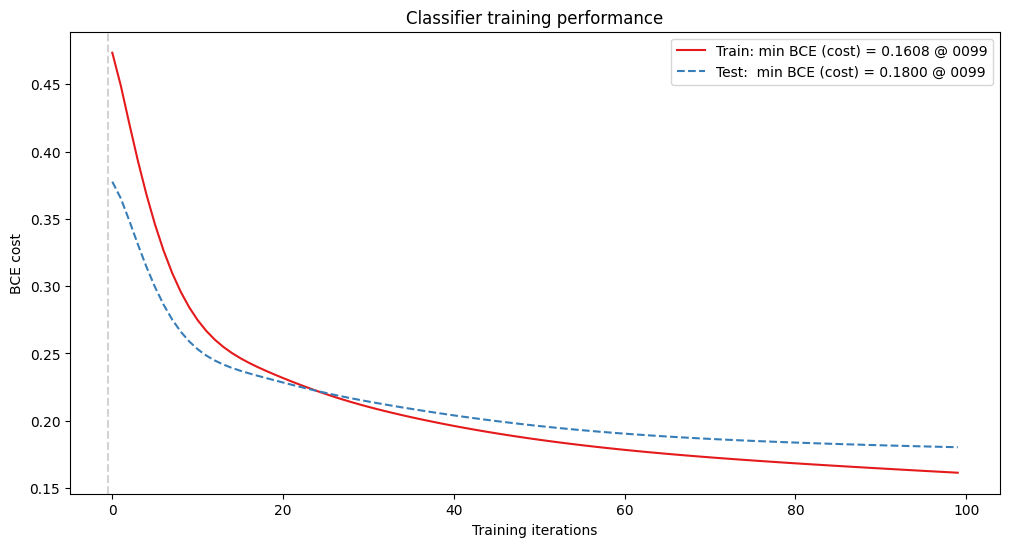

In [33]:
train_label = f'Train: min BCE (cost) = {round(train_bce_min, 5):05.4f} @ {train_bce_iter:04d}'
test_label =  f'Test:  min BCE (cost) = {round(test_bce_min, 5):05.4f} @ {test_bce_iter:04d}'
multi_plot_series(
    [train_bce_hist, test_bce_hist], X_list=[0, 0], labels=[train_label, test_label], 
    lines=['solid', 'dashed'], # colors=None, markers=None, marker_colors=None,
    rcParams=(12, 6), xlabel='Training iterations', ylabel='BCE cost',
    legend_cols=1, smooth_weight=0.6, title='Classifier training performance')

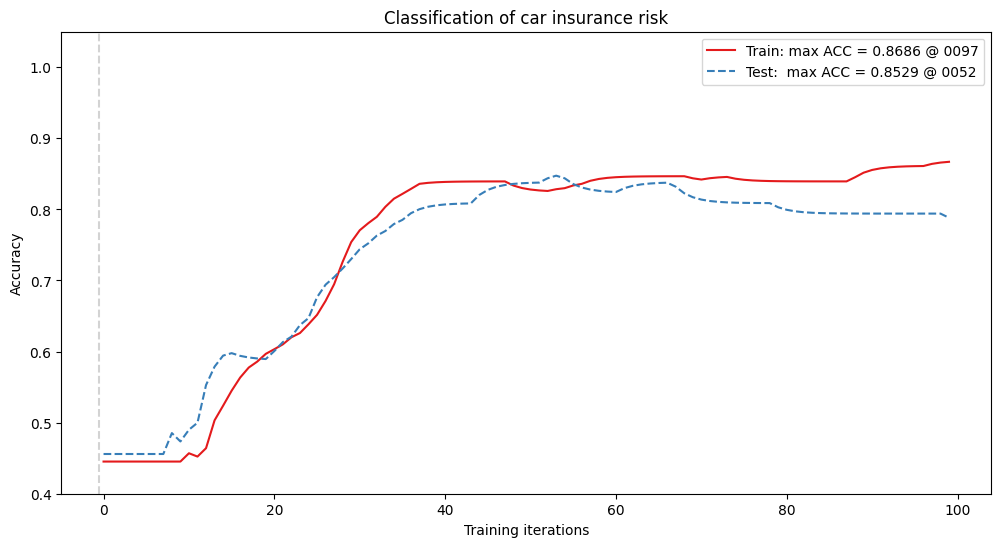

In [34]:
train_label = f'Train: max ACC = {round(train_acc_max, 5):05.4f} @ {train_acc_iter:04d}'
test_label =  f'Test:  max ACC = {round(test_acc_max, 5):05.4f} @ {test_acc_iter:04d}'
multi_plot_series(
    [train_acc_hist, test_acc_hist], X_list=[0, 0], labels=[train_label, test_label], 
    lines=['solid', 'dashed'], ylim=(0.4, 1.05), # colors=None, markers=None, marker_colors=None,
    rcParams=(12, 6), xlabel='Training iterations', ylabel='Accuracy',
    legend_cols=1, smooth_weight=0.6, title='Classification of car insurance risk')

---

## Write your observations here

- Task 1:
- Task 2:
- Task 3:
- Task 4:
- Task 5:
- Challenge:
- Reflection:

## Software (Linux)

In [35]:
import os
os.system('pip list | grep -e pennylane -e torch');

pennylane                 0.42.3
pennylane_lightning       0.42.0
torch                     2.8.0
torchaudio                2.8.0
torcheval                 0.0.7
torchmetrics              1.8.2
torchsummary              1.5.1
torchvision               0.23.0
